In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Exploratory Data Analysis


In [17]:
df = pd.read_parquet("parquet/preprocessed.parquet")
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Marital_Status_Together,Marital_Status_Widow,A_Marital_Status_Married_Kidhome,A_Marital_Status_Married_Teenhome,A_Marital_Status_Single_Kidhome,A_Marital_Status_Single_Teenhome,A_Marital_Status_Together_Kidhome,A_Marital_Status_Together_Teenhome,A_Marital_Status_Widow_Kidhome,A_Marital_Status_Widow_Teenhome
0,1,1961,57091.0,0,0,2014-06-15,0,464,5,64,...,False,False,0,0,0,0,0,0,0,0
1,10476,1958,67267.0,0,1,2014-05-13,0,134,11,59,...,False,False,0,1,0,0,0,0,0,0
2,1386,1967,32474.0,1,1,2014-11-05,0,10,0,1,...,True,False,0,0,0,0,1,1,0,0
3,5371,1989,21474.0,1,0,2014-08-04,0,6,16,24,...,False,False,0,0,1,0,0,0,0,0
4,1991,1967,44931.0,0,1,2014-01-18,0,78,0,11,...,True,False,0,0,0,0,0,1,0,0


In [18]:
df[df.Response == 1]

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Marital_Status_Together,Marital_Status_Widow,A_Marital_Status_Married_Kidhome,A_Marital_Status_Married_Teenhome,A_Marital_Status_Single_Kidhome,A_Marital_Status_Single_Teenhome,A_Marital_Status_Together_Kidhome,A_Marital_Status_Together_Teenhome,A_Marital_Status_Widow_Kidhome,A_Marital_Status_Widow_Teenhome
0,1,1961,57091.0,0,0,2014-06-15,0,464,5,64,...,False,False,0,0,0,0,0,0,0,0
3,5371,1989,21474.0,1,0,2014-08-04,0,6,16,24,...,False,False,0,0,1,0,0,0,0,0
10,10521,1977,54809.0,1,1,2013-11-09,0,63,6,57,...,False,False,1,1,0,0,0,0,0,0
22,5794,1974,46374.0,0,1,2014-03-17,1,408,0,21,...,False,False,0,1,0,0,0,0,0,0
25,5585,1972,21359.0,1,0,2013-04-20,1,12,2,17,...,False,False,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,6856,1979,21645.0,1,0,2012-03-09,75,14,0,23,...,True,False,0,0,0,0,1,0,0,0
937,7301,1982,23616.0,1,0,2012-11-17,76,4,22,11,...,False,False,0,0,1,0,0,0,0,0
994,3182,1973,46854.0,1,1,2014-03-31,81,96,1,79,...,False,False,0,0,1,1,0,0,0,0
1069,2804,1975,46098.0,1,1,2012-08-18,86,57,0,27,...,False,False,0,0,1,1,0,0,0,0


In [4]:
res = df[df.Response == 1].groupby(by='Marital_Status').Response.count()

In [5]:
nores = df[df.Response == 0].groupby(by='Marital_Status').Response.count()

In [6]:
pd.DataFrame(df[['Marital_Status', 'Response']].value_counts())

,,count
Marital_Status,Response,
Married,0,766
Together,0,520
Single,0,374
Divorced,0,184
Single,1,106
Married,1,98
Together,1,60
Widow,0,58
Divorced,1,48


<AxesSubplot:xlabel='Marital_Status', ylabel='Count'>

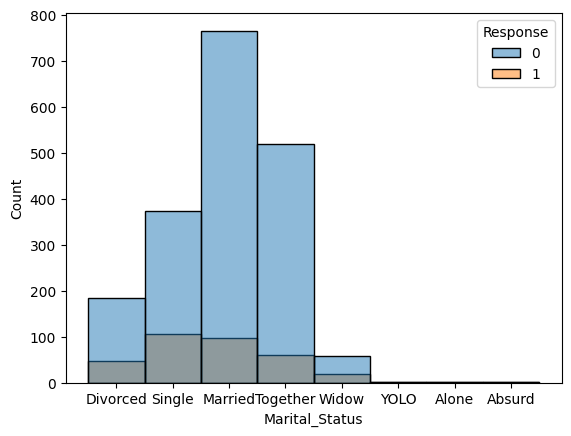

In [7]:
sns.histplot(df, x='Marital_Status', hue='Response')

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

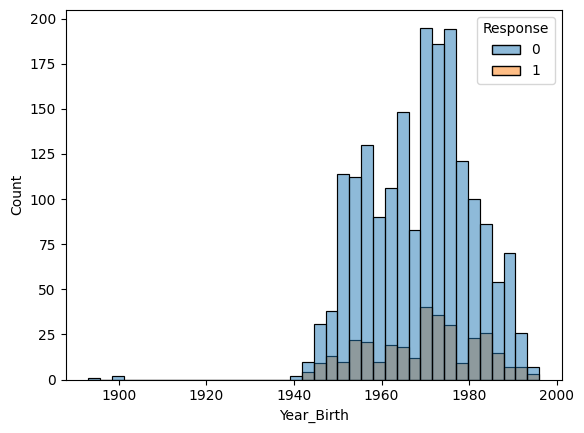

In [8]:
sns.histplot(df, x='Year_Birth', hue='Response')

<AxesSubplot:xlabel='MntFruits', ylabel='Density'>

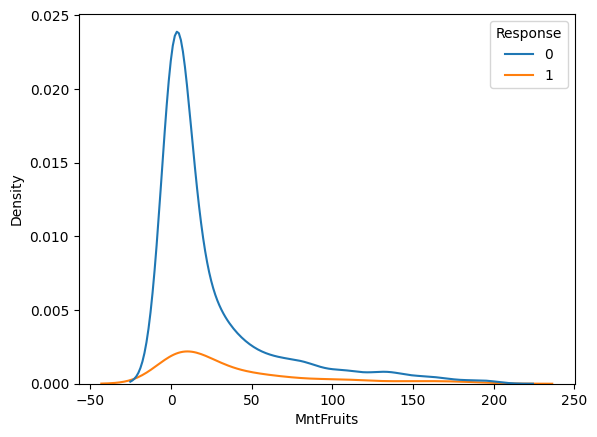

In [9]:
sns.kdeplot(df, x='MntFruits', hue='Response')

C:\Users\araza\AppData\Local\Temp\ipykernel_9700\644930312.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df, x='Kidhome', hue='Marital_Status')


<AxesSubplot:xlabel='Kidhome', ylabel='Density'>

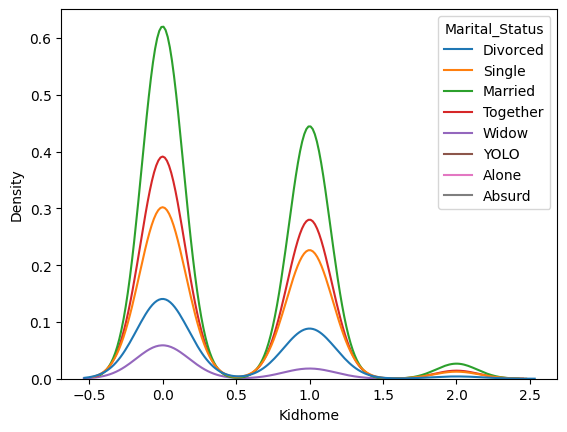

In [10]:
sns.kdeplot(df, x='Kidhome', hue='Marital_Status')

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

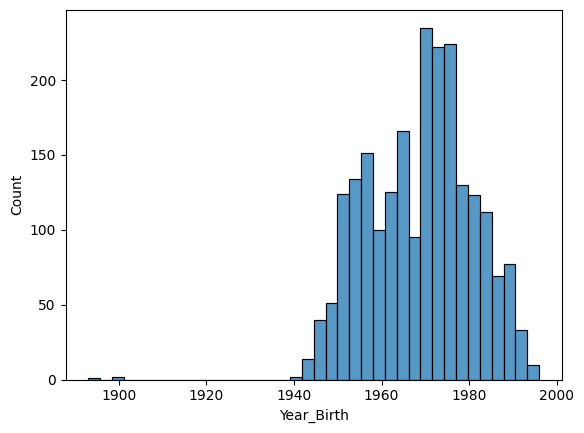

In [12]:
sns.histplot(df, x='Year_Birth')

In [14]:
df.Income.mean()

52247.25135379061

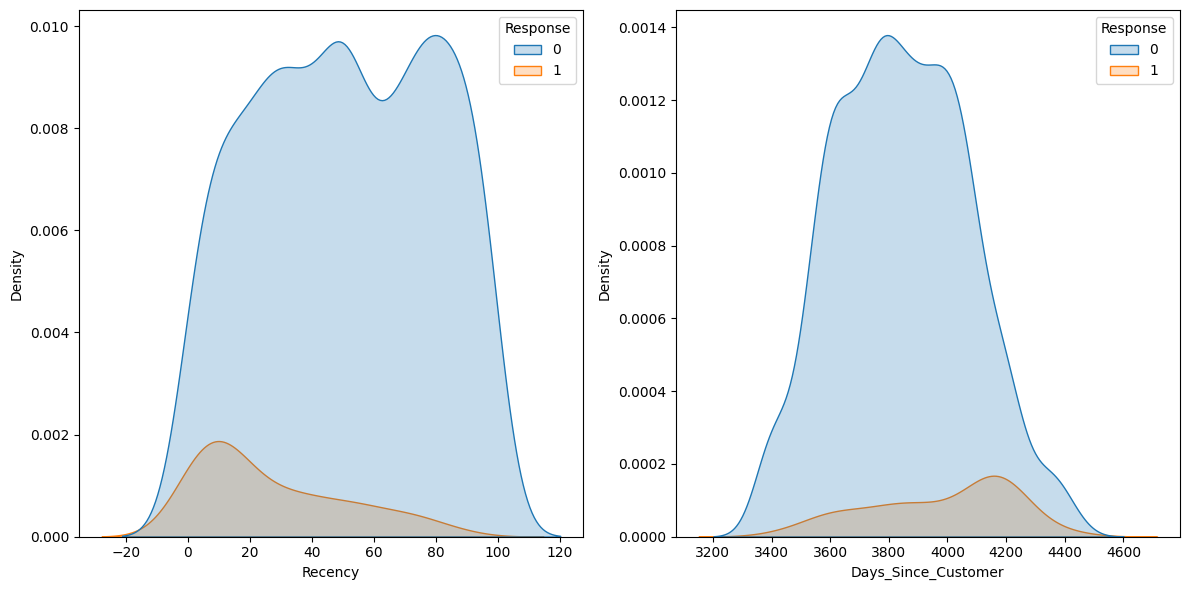

In [39]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))

dic= {
    0: {
        'x': 'Recency',
        'hue': 'Response',
    },
    1: {
        'x': 'Days_Since_Customer',
        'hue': 'Response',
    }
}

for i, ax in enumerate(axes.flat):
    sns.kdeplot(df, x=dic[i]['x'], hue=dic[i]['hue'], ax=ax, fill=True)

fig.tight_layout()
plt.savefig('recency-and-days.png')